# Importing packages 

In [8]:
# Data wrangling 
import pandas as pd 

# Ploting 
import matplotlib.pyplot as plt

# Weak base learner 
from tree import Tree

# Reading data 

In [9]:
d = pd.read_csv('data/auto-mpg.csv')

In [10]:
d.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# Ploting the data 

The $\mathbb{Y}$ variable is mpg - miles per galon. 

The $\mathbb{X}$ variable is the car weight.

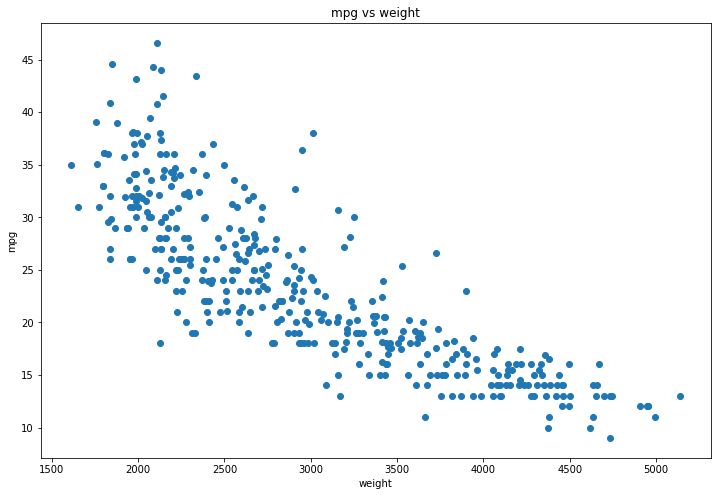

In [11]:
y = 'mpg'
x = 'weight'

plt.figure(figsize=(12, 8))
plt.plot(d[x], d[y], 'o')
plt.title('mpg vs weight')
plt.xlabel('weight')accelaration
plt.ylabel('mpg')
plt.show()

# Fitting a regression tree 

In [12]:
# Initiating the tree
reg = Tree(
    d,
    y,
    [x],
    max_depth=2
)

# Fitting on data 
reg.fit()

# Printing out the tree
reg.print_tree()

Root (level 0)
   | MSE of the node: 60.94
   | Count of observations in node: 398
   | Prediction of node: 23.515
|-------- Split rule: weight <= 2764.5 (level 1)
           | MSE of the node: 33.05
           | Count of observations in node: 194
           | Prediction of node: 29.482
|---------------- Split rule: weight <= 2217.0 (level 2)
                   | MSE of the node: 26.92
                   | Count of observations in node: 96
                   | Prediction of node: 32.621
|---------------- Split rule: weight > 2217.0 (level 2)
                   | MSE of the node: 19.96
                   | Count of observations in node: 98
                   | Prediction of node: 26.408
|-------- Split rule: weight > 2764.5 (level 1)
           | MSE of the node: 21.37
           | Count of observations in node: 204
           | Prediction of node: 17.839
|---------------- Split rule: weight <= 3657.5 (level 2)
                   | MSE of the node: 17.91
                   | Count of ob

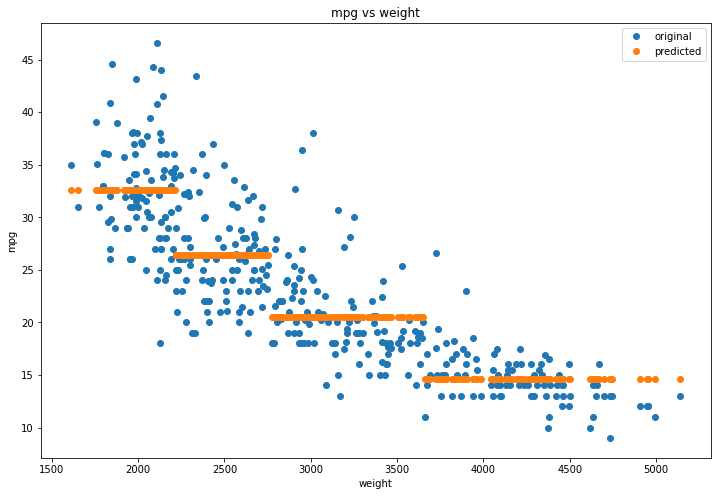

In [13]:
# Predicting 
_input = [{x: y.get(x)} for y in d.to_dict('records')]
yhat = [reg.predict(y) for y in _input]

# Saving the predictions to the training set 
d['yhat'] = yhat

# Ploting all the points 
plt.figure(figsize=(12, 8))
plt.plot(d[x], d[y], 'o', label='original')
plt.plot(d[x], d['yhat'], 'o', label='predicted')
plt.title('mpg vs weight')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend()
plt.show()